In [1]:
import numpy as np
import nibabel as nib
import PIL
import os
import sys
import matplotlib.pyplot as plt
import re

In [2]:
case_path = '../../KiTS23/KiTS_subset/case_00016/'
print(os.listdir(case_path))

['imaging.nii.gz', 'instances', 'segmentation.nii.gz']


In [3]:
nifti_file_path = case_path + 'imaging.nii.gz'
segmentations_file_path = case_path + 'segmentation.nii.gz'

img = nib.load(nifti_file_path)
seg = nib.load(segmentations_file_path)

print(img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 178 512 512   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [1.        2.5       0.6503906 0.6503906 1.        1.        1.
 1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : -0.70710677
quatern_c       : 0.0
quatern_d       : 0.70710677
qoffset_x       : 0.0
qoffset_y       : 0.0
qoffset_z   

In [4]:
print(seg)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (178, 512, 512)
affine:
[[ 0.          0.         -0.65039062  0.        ]
 [ 0.         -0.65039062  0.          0.        ]
 [-2.5         0.          0.          0.        ]
 [ 0.          0.          0.          1.        ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 178 512 512   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1.        2.5       0.6503906 0.6503906 1.        1.        1.
 1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset   

<class 'numpy.ndarray'>
89
Image data shape: (178, 512, 512)


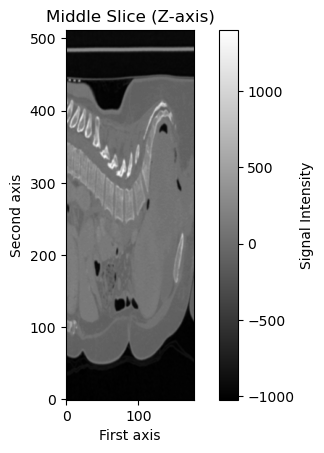

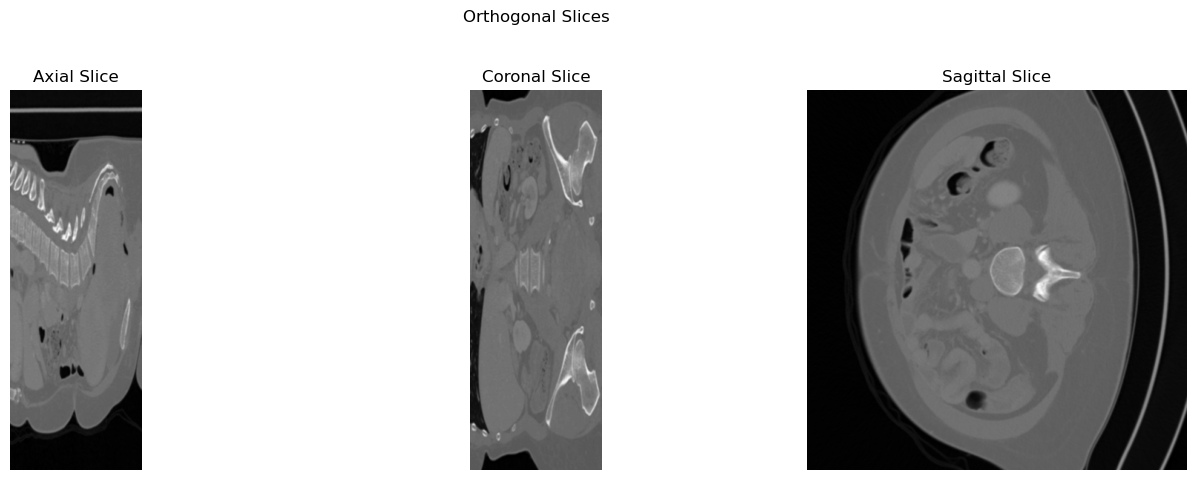

In [5]:
viz_file_path = nifti_file_path
# viz_file_path = segmentations_file_path
idx = -1
# idx = 55

try:
    # Load the NIfTI image
    img = nib.load(viz_file_path)

    # Get the image data as a NumPy array
    img_data = img.get_fdata()
    print(type(img_data))
    if idx < 0:
        idx = img_data.shape[0] // 2
    print(idx)

    # Get the shape of the data (e.g., (X, Y, Z) for 3D, or (X, Y, Z, T) for 4D)
    print(f"Image data shape: {img_data.shape}")

    # Select a slice to visualize (e.g., the middle slice along the Z-axis)
    # Adjust the axis and slice index based on your data and desired view
    if img_data.ndim == 3:
        mid_slice_z = img_data[:, :, img_data.shape[2] // 2]
#         mid_slice_z = img_data[img_data.shape[0] // 2, :, :]
        plt.imshow(mid_slice_z.T, cmap='gray', origin='lower')
        plt.title(f'Middle Slice (Z-axis)')
    elif img_data.ndim == 4:
        # If it's 4D (e.g., fMRI with time), pick a time point
        time_point = 0
        mid_slice_z = img_data[:, :, img_data.shape[2] // 2, time_point]
        plt.imshow(mid_slice_z.T, cmap='gray', origin='lower')
        plt.title(f'Middle Slice (Z-axis), Time Point {time_point}')
    else:
        print("Image dimension not supported for simple 2D slice visualization.")
        exit()

    plt.xlabel('First axis')
    plt.ylabel('Second axis')
    plt.colorbar(label='Signal Intensity')
    plt.show()

    # You can also visualize slices along other axes
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Axial slice (z-axis)
    axes[0].imshow(img_data[:, :, img_data.shape[2] // 2].T, cmap='gray', origin='lower')
    axes[0].set_title('Axial Slice')
    axes[0].axis('off')

    # Coronal slice (y-axis)
    axes[1].imshow(img_data[:, img_data.shape[1] // 2, :].T, cmap='gray', origin='lower')
    axes[1].set_title('Coronal Slice')
    axes[1].axis('off')

    # Sagittal slice (x-axis)
#     axes[2].imshow(img_data[img_data.shape[0] // 2, :, :].T, cmap='gray', origin='lower')
    axes[2].imshow(img_data[idx, :, :].T, cmap='gray', origin='lower')
    axes[2].set_title('Sagittal Slice')
    axes[2].axis('off')

    plt.suptitle('Orthogonal Slices')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust for suptitle
    plt.show()

except FileNotFoundError:
    print(f"Error: File not found at {nifti_file_path}")
except Exception as e:
    print(f"An error occurred: {e}")


<class 'numpy.ndarray'>
89
Image data shape: (178, 512, 512)


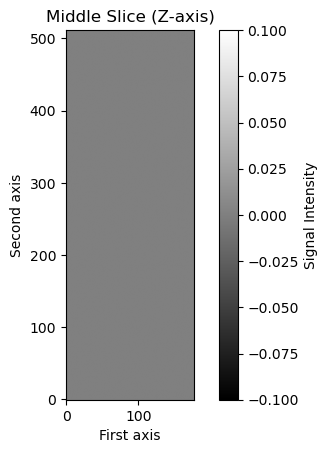

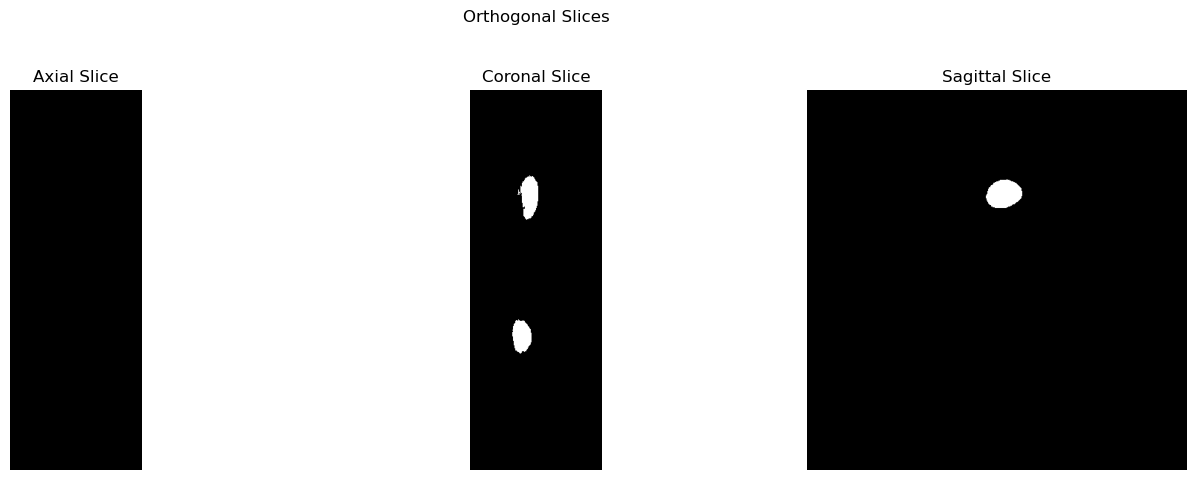

In [6]:
# viz_file_path = nifti_file_path
viz_file_path = segmentations_file_path
idx = -1
# idx = 55

try:
    # Load the NIfTI image
    img = nib.load(viz_file_path)

    # Get the image data as a NumPy array
    img_data = img.get_fdata()
    print(type(img_data))
    if idx < 0:
        idx = img_data.shape[0] // 2
    print(idx)

    # Get the shape of the data (e.g., (X, Y, Z) for 3D, or (X, Y, Z, T) for 4D)
    print(f"Image data shape: {img_data.shape}")

    # Select a slice to visualize (e.g., the middle slice along the Z-axis)
    # Adjust the axis and slice index based on your data and desired view
    if img_data.ndim == 3:
        mid_slice_z = img_data[:, :, img_data.shape[2] // 2]
#         mid_slice_z = img_data[img_data.shape[0] // 2, :, :]
        plt.imshow(mid_slice_z.T, cmap='gray', origin='lower')
        plt.title(f'Middle Slice (Z-axis)')
    elif img_data.ndim == 4:
        # If it's 4D (e.g., fMRI with time), pick a time point
        time_point = 0
        mid_slice_z = img_data[:, :, img_data.shape[2] // 2, time_point]
        plt.imshow(mid_slice_z.T, cmap='gray', origin='lower')
        plt.title(f'Middle Slice (Z-axis), Time Point {time_point}')
    else:
        print("Image dimension not supported for simple 2D slice visualization.")
        exit()

    plt.xlabel('First axis')
    plt.ylabel('Second axis')
    plt.colorbar(label='Signal Intensity')
    plt.show()

    # You can also visualize slices along other axes
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Axial slice (z-axis)
    axes[0].imshow(img_data[:, :, img_data.shape[2] // 2].T, cmap='gray', origin='lower')
    axes[0].set_title('Axial Slice')
    axes[0].axis('off')

    # Coronal slice (y-axis)
    axes[1].imshow(img_data[:, img_data.shape[1] // 2, :].T, cmap='gray', origin='lower')
    axes[1].set_title('Coronal Slice')
    axes[1].axis('off')

    # Sagittal slice (x-axis)
#     axes[2].imshow(img_data[img_data.shape[0] // 2, :, :].T, cmap='gray', origin='lower')
    axes[2].imshow(img_data[idx, :, :].T, cmap='gray', origin='lower')
    axes[2].set_title('Sagittal Slice')
    axes[2].axis('off')

    plt.suptitle('Orthogonal Slices')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust for suptitle
    plt.show()

except FileNotFoundError:
    print(f"Error: File not found at {nifti_file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

In [7]:
np.max(img_data)

2.0

### Steps for dataset generation for KiTS23



1) Get file paths for all case_XXXXX files

Do for each case:
1) Find the number of cysts, tumors, and kidneys (kidneys should ideally be 2). Each of these is one ROI (region of interest)
2) For each ROI, find the slice index which has the strongest mask (highest number of mask pixels)
3) Pull the slice from imaging.nii and segmentation.nii corresponding to that index. This becomes one training example

Note that such training examples may have two or more ROIs - however, only one of these ROIs will be at it's strongest visibility here. The other ROIs may exist, but will be weaker; which is fine. The model should ideally be able to predict both ROIs in their respective strengths.
    
Done

Ideally put these in separate folders for cysts, tumors, and kidneys

### Test/Val set evaluations

In [8]:
case_path = '../../KiTS23/KiTS_subset/case_00008/instances/'
case_imaging_path = '../../KiTS23/KiTS_subset/case_00008/imaging.nii.gz'

In [9]:
case_instances = os.listdir(case_path)
print(case_instances, case_instances[-1])

['cyst_instance-5_annotation-2.nii.gz', 'cyst_instance-1_annotation-1.nii.gz', 'cyst_instance-1_annotation-2.nii.gz', 'cyst_instance-1_annotation-3.nii.gz', 'cyst_instance-2_annotation-1.nii.gz', 'cyst_instance-2_annotation-2.nii.gz', 'cyst_instance-2_annotation-3.nii.gz', 'cyst_instance-3_annotation-1.nii.gz', 'cyst_instance-3_annotation-2.nii.gz', 'cyst_instance-3_annotation-3.nii.gz', 'cyst_instance-4_annotation-1.nii.gz', 'cyst_instance-4_annotation-2.nii.gz', 'cyst_instance-4_annotation-3.nii.gz', 'cyst_instance-5_annotation-1.nii.gz', 'cyst_instance-5_annotation-3.nii.gz', 'cyst_instance-6_annotation-1.nii.gz', 'cyst_instance-6_annotation-2.nii.gz', 'cyst_instance-6_annotation-3.nii.gz', 'cyst_instance-7_annotation-1.nii.gz', 'cyst_instance-7_annotation-2.nii.gz', 'cyst_instance-7_annotation-3.nii.gz', 'cyst_instance-8_annotation-1.nii.gz', 'cyst_instance-8_annotation-2.nii.gz', 'cyst_instance-8_annotation-3.nii.gz', 'kidney_instance-1_annotation-1.nii.gz', 'kidney_instance-1_ann

In [10]:
# for i in case_instances:
#     if i.startswith('cyst'):
#         print(i)

In [11]:
def get_slice_index(img):
    print(img.shape)
#     print(np.sum(img, axis = (1,2)))
    return np.argmax(np.sum(img, axis=(1,2)))

<class 'numpy.ndarray'> (227, 512, 512)
(227, 512, 512)
131
Image data shape: (227, 512, 512)


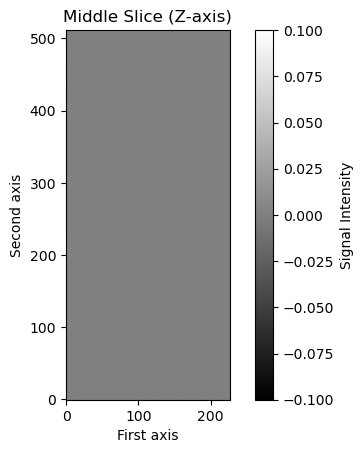

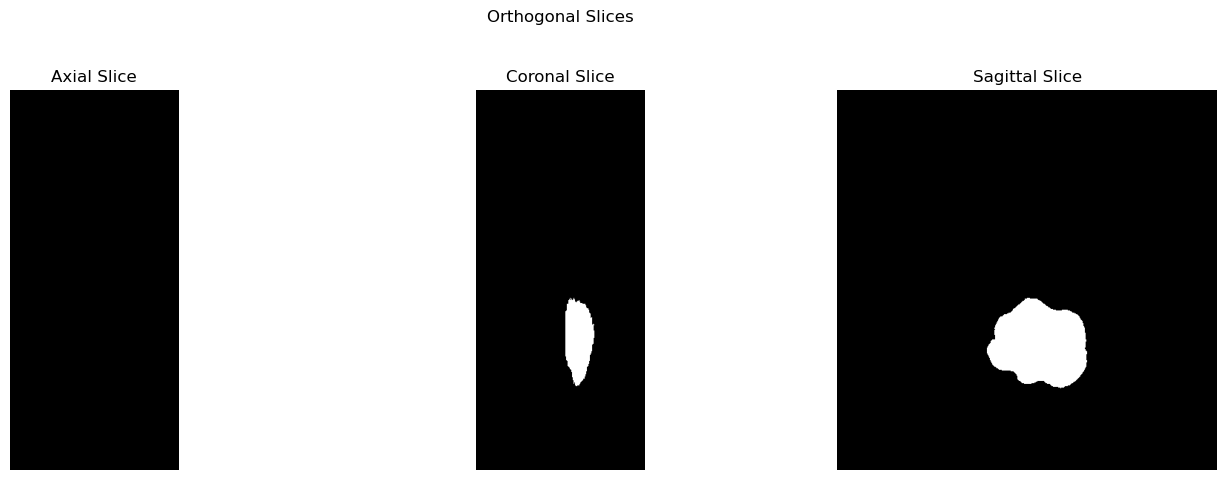

In [12]:
viz_file_path = os.path.join(case_path, 'kidney_instance-1_annotation-1.nii.gz')
# viz_file_path = os.path.join(case_path, 'tumor_instance-1_annotation-1.nii.gz')

slice_idx = -1

try:
    # Load the NIfTI image
    img = nib.load(viz_file_path)

    # Get the image data as a NumPy array
    img_data = img.get_fdata()
    print(type(img_data), img_data.shape)
    if slice_idx < 0:
        slice_idx = get_slice_index(img_data)
    print(slice_idx)

    # Get the shape of the data (e.g., (X, Y, Z) for 3D, or (X, Y, Z, T) for 4D)
    print(f"Image data shape: {img_data.shape}")

    # Select a slice to visualize (e.g., the middle slice along the Z-axis)
    # Adjust the axis and slice index based on your data and desired view
    if img_data.ndim == 3:
        mid_slice_z = img_data[:, :, img_data.shape[2] // 2]
#         mid_slice_z = img_data[img_data.shape[0] // 2, :, :]
        plt.imshow(mid_slice_z.T, cmap='gray', origin='lower')
        plt.title(f'Middle Slice (Z-axis)')
    elif img_data.ndim == 4:
        # If it's 4D (e.g., fMRI with time), pick a time point
        time_point = 0
        mid_slice_z = img_data[:, :, img_data.shape[2] // 2, time_point]
        plt.imshow(mid_slice_z.T, cmap='gray', origin='lower')
        plt.title(f'Middle Slice (Z-axis), Time Point {time_point}')
    else:
        print("Image dimension not supported for simple 2D slice visualization.")
        exit()

    plt.xlabel('First axis')
    plt.ylabel('Second axis')
    plt.colorbar(label='Signal Intensity')
    plt.show()

    # You can also visualize slices along other axes
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Axial slice (z-axis)
    axes[0].imshow(img_data[:, :, img_data.shape[2] // 2].T, cmap='gray', origin='lower')
    axes[0].set_title('Axial Slice')
    axes[0].axis('off')

    # Coronal slice (y-axis)
    axes[1].imshow(img_data[:, img_data.shape[1] // 2, :].T, cmap='gray', origin='lower')
    axes[1].set_title('Coronal Slice')
    axes[1].axis('off')

    # Sagittal slice (x-axis)
#     axes[2].imshow(img_data[img_data.shape[0] // 2, :, :].T, cmap='gray', origin='lower')
    axes[2].imshow(img_data[slice_idx, :, :].T, cmap='gray', origin='lower')
    axes[2].set_title('Sagittal Slice')
    axes[2].axis('off')

    plt.suptitle('Orthogonal Slices')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust for suptitle
    plt.show()

except FileNotFoundError:
    print(f"Error: File not found at {nifti_file_path}")
except Exception as e:
    print(f"An error occurred: {e}")


In [13]:
z = np.sum(img_data, axis=(1,2))
print(z, z.shape)

[    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.   877.  1564.  2229.  2513.  2932.
  5042.  6202.  7009.  8114.  9178.  9628. 10390. 10399. 10931. 11528.
 11564. 11923. 11710. 11457. 11552. 11704. 11485. 11253. 11267. 10924.
 10912

In [14]:
np.argmax(z)

131

In [15]:
z[130]

11564.0

In [16]:
case_path[:-10]

'../../KiTS23/KiTS_subset/case_00008/'

<class 'numpy.ndarray'> (227, 512, 512)
131
Image data shape: (227, 512, 512)


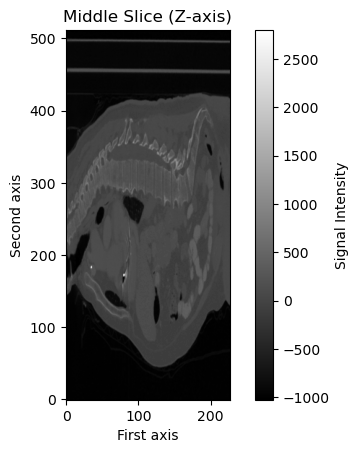

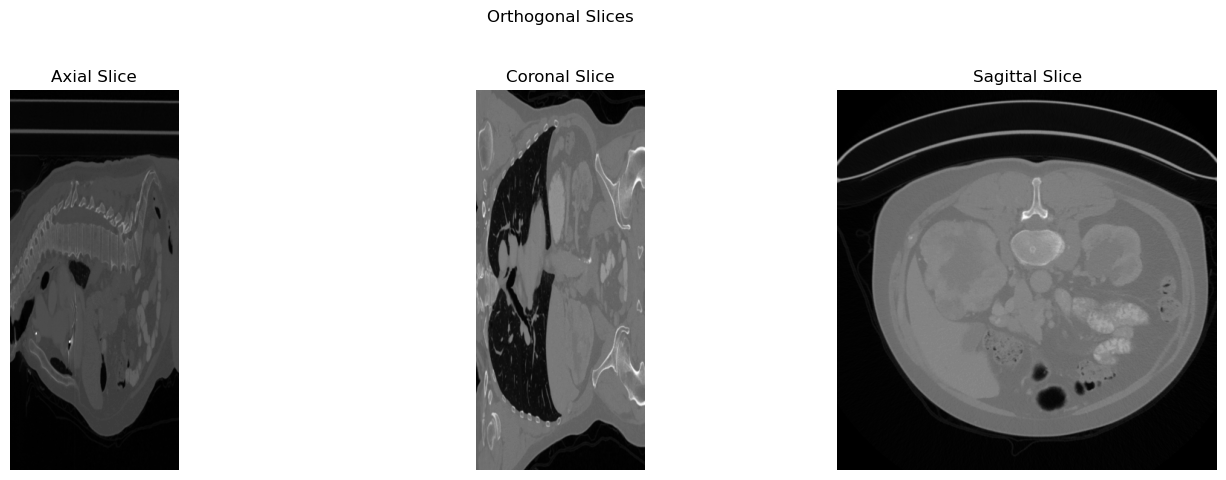

In [26]:
viz_file_path = os.path.join(case_path[:-10], 'imaging.nii.gz')
# viz_file_path = os.path.join(case_path[:-10], 'instances/kidney_instance-2_annotation-1.nii.gz')

# slice_idx = -1

try:
    # Load the NIfTI image
    img = nib.load(viz_file_path)

    # Get the image data as a NumPy array
    img_data = img.get_fdata()
    print(type(img_data), img_data.shape)
    if slice_idx < 0:
        slice_idx = get_slice_index(img_data)
    print(slice_idx)

    # Get the shape of the data (e.g., (X, Y, Z) for 3D, or (X, Y, Z, T) for 4D)
    print(f"Image data shape: {img_data.shape}")

    # Select a slice to visualize (e.g., the middle slice along the Z-axis)
    # Adjust the axis and slice index based on your data and desired view
    if img_data.ndim == 3:
        mid_slice_z = img_data[:, :, img_data.shape[2] // 2]
#         mid_slice_z = img_data[img_data.shape[0] // 2, :, :]
        plt.imshow(mid_slice_z.T, cmap='gray', origin='lower')
        plt.title(f'Middle Slice (Z-axis)')
    elif img_data.ndim == 4:
        # If it's 4D (e.g., fMRI with time), pick a time point
        time_point = 0
        mid_slice_z = img_data[:, :, img_data.shape[2] // 2, time_point]
        plt.imshow(mid_slice_z.T, cmap='gray', origin='lower')
        plt.title(f'Middle Slice (Z-axis), Time Point {time_point}')
    else:
        print("Image dimension not supported for simple 2D slice visualization.")
        exit()

    plt.xlabel('First axis')
    plt.ylabel('Second axis')
    plt.colorbar(label='Signal Intensity')
    plt.show()

    # You can also visualize slices along other axes
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Axial slice (z-axis)
    axes[0].imshow(img_data[:, :, img_data.shape[2] // 2].T, cmap='gray', origin='lower')
    axes[0].set_title('Axial Slice')
    axes[0].axis('off')

    # Coronal slice (y-axis)
    axes[1].imshow(img_data[:, img_data.shape[1] // 2, :].T, cmap='gray', origin='lower')
    axes[1].set_title('Coronal Slice')
    axes[1].axis('off')

    # Sagittal slice (x-axis)
#     axes[2].imshow(img_data[img_data.shape[0] // 2, :, :].T, cmap='gray', origin='lower')
    axes[2].imshow(img_data[slice_idx, :, :].T, cmap='gray', origin='lower')
    axes[2].set_title('Sagittal Slice')
    axes[2].axis('off')

    plt.suptitle('Orthogonal Slices')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust for suptitle
    plt.show()

except FileNotFoundError:
    print(f"Error: File not found at {nifti_file_path}")
except Exception as e:
    print(f"An error occurred: {e}")


In [18]:
y = img_data

In [19]:
print(y.dtype)

float64


In [20]:
case_instances[0]

'cyst_instance-5_annotation-2.nii.gz'

In [21]:
print(case_instances[0].split('-'))

['cyst_instance', '5_annotation', '2.nii.gz']


In [22]:
re.split(r'[_\-]+', case_instances[0])

['cyst', 'instance', '5', 'annotation', '2.nii.gz']

In [23]:
case_instances_split = list()
for j in case_instances:
    case_instances_split.append(re.split(r'[\-_]+', j))

In [24]:
os.getcwd()

'/media/omkar/646AC6B66AC684701/Thesis_Work/UNetSeg_PyTorch'